In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/jacobyeung/anaconda3/envs/metaearth/lib/python3.8/site-packages')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shapely
import subprocess
from metaearth.snotel import *
from metloom.pointdata.snotel_client import SeriesSnotelClient, MetaDataSnotelClient
from metloom.pointdata.snotel import SnotelPointData
from datetime import datetime
import geopandas as gpd
from metloom.pointdata import CDECPointData
from metloom.variables import CdecStationVariables

In [4]:
snotel_summary = pd.read_csv('../../snotel_data/SNOTEL_summary.csv', delimiter=',', 
encoding_errors="ignore", lineterminator='\n')
snotel_summary.columns = [col.rstrip(' ') for col in snotel_summary.columns]

In [6]:
snotel_summary.columns

Index(['Num', 'SNOTEL ID', 'SNOTEL State', 'SNOTEL Name', 'SNOTEL Elev (ft)',
       'SNOTEL Lat ()', 'SNOTEL Lon ()', 'Data Starting Date',
       'Data Ending Date', 'Unnamed: 9', 'Unnamed: 10', '\r'],
      dtype='object')

In [7]:
snotel_summary.head()

Num  SNOTEL ID SNOTEL State    SNOTEL Name  SNOTEL Elev (ft)  \
0    1       1000           OR  Annie Springs              6010   
1    2       1001           AK      Long Lake               850   
2    3       1003           AK  Mcneil Canyon              1320   
3    4       1005           CO      Ute Creek             10650   
4    5       1006           NV     Lewis Peak              7400   

   SNOTEL Lat ()  SNOTEL Lon () Data Starting Date Data Ending Date  \
0          42.87        -122.17          9/15/2000        9/30/2018   
1          58.19        -133.83          10/1/1999        9/30/2018   
2          59.74        -151.25          10/1/1986        9/30/2018   
3          37.61        -105.37          8/15/2000        9/30/2018   
4          40.36        -116.86          8/23/2000        9/30/2018   

   Unnamed: 9  Unnamed: 10  \r  
0         NaN          NaN  \r  
1         NaN          NaN  \r  
2         NaN          NaN  \r  
3         NaN          NaN  \r  
4         NaN          NaN  \r

In [8]:
def get_triplet(snotel_summary, id):
    curr_snotel = snotel_summary[snotel_summary['SNOTEL ID']==id]
    id = curr_snotel['SNOTEL ID'].values[0]
    state = curr_snotel['SNOTEL State'].values[0]
    triplet = f'{id}:{state}:SNTL'
    return triplet

In [9]:
rawah_triplet = get_triplet(snotel_summary, 1032)

In [10]:
rawah_triplet

'1032:CO:SNTL'

# Area of interest

In [11]:
aoi_file = '../config/aoi/aso-2013-2019-regions.json'
region = gpd.read_file(aoi_file)

In [12]:
region

geometry
0  MULTIPOLYGON (((-119.09765 38.00096, -119.0976...

In [12]:
# snotel_point = SnotelPointData("713:CO:SNTL", "MyStation")
# vars = [snotel_point.ALLOWED_VARIABLES.SWE]
# points = SnotelPointData.points_from_geometry(region, vars)
# df = points.to_dataframe()
# print(df)

In [13]:
# vrs = [
#     CdecStationVariables.SWE,
#     CdecStationVariables.SNOWDEPTH
# ]
# points = CDECPointData.points_from_geometry(region, vrs, snow_courses=True)
# df = points.to_dataframe()
# print(df)


In [14]:
# snotel_point = SnotelPointData("713:CO:SNTL", "MyStation")
# vars = [snotel_point.ALLOWED_VARIABLES.SWE]
# temp_points = SnotelPointData.points_from_geometry(region, vars)
# temp = temp_points.to_dataframe()
# print(temp)

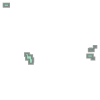

In [15]:
region.unary_union

# SnotelProvider

In [15]:
# This call works.
snow = SnotelProvider()
data = snow.region_to_items(region, variables=['WTEQ'], datetime='1980-1-1/2001-2-2', collection=None, max_items=None)

{'maxLatitude': 48.090858320977894, 'minLatitude': 36.14965131371051, 'maxLongitude': -105.77091614487038, 'minLongitude': -124.1847180025171, 'networkCds': ['SNTL', 'USGS', 'BOR', 'COOP'], 'elementCds': 'WTEQ', 'logicalAnd': 'true'}
variable SensorDescription(code='WTEQ', name='SWE', description=None, accumulated=False)
698
{'stationTriplet': '405:WY:SNTL'}
{'stationTriplet': '550:ID:SNTL'}
{'stationTriplet': '355:MT:SNTL'}
{'stationTriplet': '1015:WY:SNTL'}
{'stationTriplet': '1188:CO:SNTL'}
{'stationTriplet': '809:CA:SNTL'}
{'stationTriplet': '521:UT:SNTL'}
{'stationTriplet': '328:MT:SNTL'}
{'stationTriplet': '302:OR:SNTL'}
{'stationTriplet': '327:CO:SNTL'}
{'stationTriplet': '434:OR:SNTL'}
{'stationTriplet': '347:MT:SNTL'}
{'stationTriplet': '699:WA:SNTL'}
{'stationTriplet': '789:OR:SNTL'}
{'stationTriplet': '332:UT:SNTL'}
{'stationTriplet': '449:WY:SNTL'}
{'stationTriplet': '325:WY:SNTL'}
{'stationTriplet': '771:CA:SNTL'}
{'stationTriplet': '804:WA:SNTL'}
{'stationTriplet': '2029:

In [16]:
data.to_dataframe()

name           id datasource  \
0           Jackson Peak  550:ID:SNTL       NRCS   
1            Bloody Dick  355:MT:SNTL       NRCS   
2           Beaver Creek  328:MT:SNTL       NRCS   
3               Beartown  327:CO:SNTL       NRCS   
4              Daly Lake  434:OR:SNTL       NRCS   
5             Black Bear  347:MT:SNTL       NRCS   
6             Pope Ridge  699:WA:SNTL       NRCS   
7            Starr Ridge  789:OR:SNTL       NRCS   
8        Ben Lomond Peak  332:UT:SNTL       NRCS   
9            Divide Peak  449:WY:SNTL       NRCS   
10      Bear Trap Meadow  325:WY:SNTL       NRCS   
11           Sonora Pass  771:CA:SNTL       NRCS   
12        Surprise Lakes  804:WA:SNTL       NRCS   
13        Ochoco Meadows  671:OR:SNTL       NRCS   
14      Bone Springs Div  358:WY:SNTL       NRCS   
15        Magic Mountain  610:ID:SNTL       NRCS   
16            Widtsoe #3  865:UT:SNTL       NRCS   
17                Divide  448:MT:SNTL       NRCS   
18           Meadow Lake  620:ID:SNTL       NRCS   
19            Old Battle  673:WY:SNTL       NRCS   
20         Mineral Creek  629:CO:SNTL       NRCS   
21           Basin Creek  315:MT:SNTL       NRCS   
22        Phantom Valley  688:CO:SNTL       NRCS   
23            Wood Creek  876:MT:SNTL       NRCS   
24                Tipton  821:OR:SNTL       NRCS   
25           Hayden Fork  517:UT:SNTL       NRCS   
26            High Ridge  523:OR:SNTL       NRCS   
27        Red Pine Ridge  714:UT:SNTL       NRCS   
28       Emigrant Summit  471:ID:SNTL       NRCS   
29          Lucky Strike  605:OR:SNTL       NRCS   
30  Blue Mountain Spring  357:OR:SNTL       NRCS   

                                     geometry  
0    POINT Z (-115.44322 44.05092 7070.00000)  
1    POINT Z (-113.50099 45.16507 7600.00000)  
2    POINT Z (-111.35852 44.94966 7850.00000)  
3   POINT Z (-107.51240 37.71433 11600.00000)  
4    POINT Z (-122.08718 44.52147 3690.00000)  
5    POINT Z (-111.12803 44.50832 8170.00000)  
6    POINT Z (-120.56622 47.99090 3590.00000)  
7    POINT Z (-119.02162 44.26423 5250.00000)  
8    POINT Z (-111.94405 41.37603 7689.00000)  
9    POINT Z (-107.15255 41.30399 8730.00000)  
10   POINT Z (-107.06135 43.88743 8200.00000)  
11   POINT Z (-119.60030 38.31021 8770.00000)  
12   POINT Z (-121.76345 46.09497 4290.00000)  
13   POINT Z (-120.33110 44.42917 5430.00000)  
14   POINT Z (-107.58110 44.67888 9350.00000)  
15   POINT Z (-114.28662 42.18072 6880.00000)  
16   POINT Z (-111.88163 37.83633 9640.00000)  
17   POINT Z (-112.05645 44.79317 7800.00000)  
18   POINT Z (-113.31815 44.43655 9150.00000)  
19   POINT Z (-106.96926 41.15426 9860.00000)  
20  POINT Z (-107.72657 37.84737 10046.00000)  
21   POINT Z (-112.52047 45.79737 7180.00000)  
22   POINT Z (-105.84606 40.39803 9045.00000)  
23   POINT Z (-112.81428 47.44847 5960.00000)  
24   POINT Z (-118.42617 44.65567 5150.00000)  
25   POINT Z (-110.88472 40.79669 9130.00000)  
26   POINT Z (-118.10657 45.69682 4920.00000)  
27   POINT Z (-111.27221 39.45197 8988.00000)  
28   POINT Z (-111.56085 42.36055 7390.00000)  
29   POINT Z (-118.84790 45.27478 4970.00000)  
30   POINT Z (-118.51722 44.24767 5870.00000)